In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose

path_to_data = '/home/fraga/Documents/Series-Temporales/Data/macrodata.csv'

df = pd.read_csv(path_to_data, index_col = 0, parse_dates = True)
df.shape

(203, 14)

In [26]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


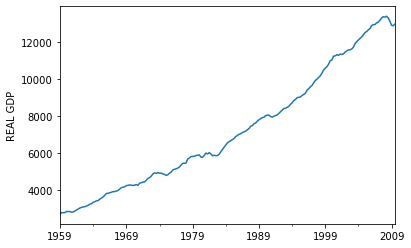

In [27]:
ax = df.realgdp.plot()
ax.autoscale(axis = 'x', tight = True)
ax.set(ylabel = 'REAL GDP')
plt.show()

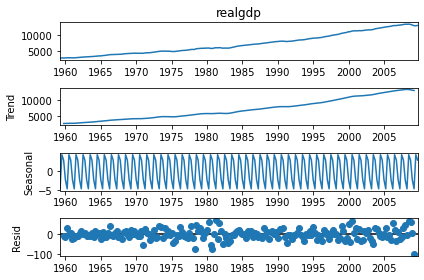

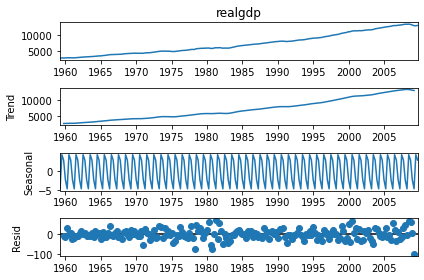

In [33]:
s_dec_additive = seasonal_decompose(df.realgdp, model = 'additive')
s_dec_additive.plot()
plt.show()

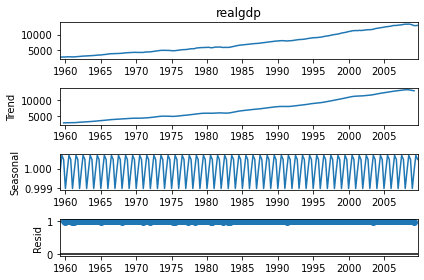

In [29]:
s_dec_multiplicative = seasonal_decompose(df.realgdp, model = 'multiplicative')
s_dec_multiplicative.plot()
plt.show()

In [30]:
gdp_cycle, gdp_trend = hpfilter(df.realgdp, lamb = 1600)

In [36]:
df['trend'] = gdp_trend
df.head(10)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333
1960-06-30,1960,2,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55,2811.349758
1960-09-30,1960,3,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.70,-0.34,2840.377312
1960-12-31,1960,4,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08,2870.078365
1961-03-31,1961,1,2819.264,1787.7,266.405,475.854,1984.5,29.81,142.1,2.37,6.8,182.992,-0.40,2.77,2900.631438
1961-06-30,1961,2,2872.005,1814.3,286.246,480.328,2014.4,29.92,142.9,2.29,7.0,183.691,1.47,0.81,2932.172890


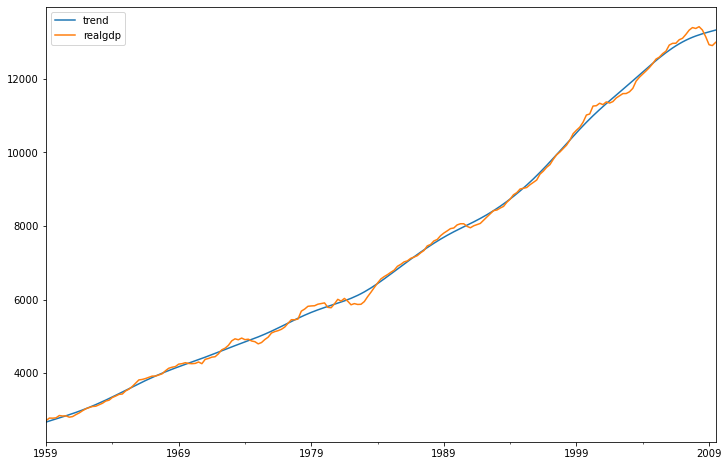

In [38]:
df[['trend', 'realgdp']].plot(figsize = (12, 8))
plt.show()

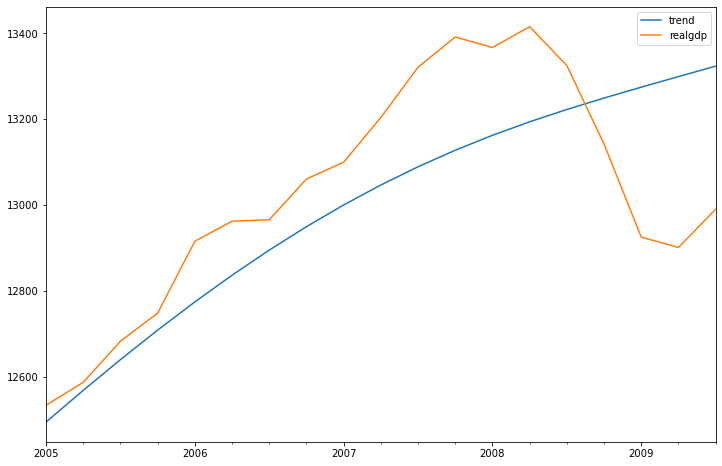

In [40]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize = (12, 8))
plt.show()